In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as px
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS

In [7]:
results_df = pd.read_csv('../data/clean/results_df.csv')

In [8]:
positive_reviews = results_df[results_df['positive'] > 0.5]['reviews'].astype(str)
negative_reviews = results_df[results_df['negative'] > 0.5]['reviews'].astype(str)

## Word Frequency for Positive Reviews

In [9]:
import seaborn as sns
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariasoriano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from collections import Counter

def get_most_frequent_words(series, n=10):
    stop_words = set(stopwords.words('english'))
    
    words = ' '.join(series).split()
    words = [word for word in words if word.lower() not in stop_words]
    
    word_counts = Counter(words)
    most_common = word_counts.most_common(n)
    return most_common

In [13]:
positive_words = get_most_frequent_words(positive_reviews)
negative_words = get_most_frequent_words(negative_reviews)

In [16]:
df_positive = pd.DataFrame(positive_words, columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(negative_words, columns=['Word', 'Frequency'])

In [17]:
fig = go.Figure(data=[go.Bar(
    x=df_negative['Frequency'].head(10),
    y=df_negative['Word'].head(10),
    orientation='h',
    marker=dict(color=df_negative['Frequency'].head(10), coloraxis="coloraxis")
)])

fig.update_layout(
    title='Top 10 Most Frequent Negative Words (excluding stopwords)',
    xaxis=dict(title='Frequency'),
    yaxis=dict(title='Word'),
    coloraxis=dict(colorscale='Reds'),
    showlegend=False
)

fig.show()

In [18]:
fig = go.Figure(data=[go.Bar(
    x=df_positive['Frequency'].head(10),
    y=df_positive['Word'].head(10),
    orientation='h',
    marker=dict(color=df_positive['Frequency'].head(10), coloraxis="coloraxis")
)])

fig.update_layout(
    title='Top 10 Most Frequent Positive Words (excluding stopwords)',
    xaxis=dict(title='Frequency'),
    yaxis=dict(title='Word'),
    coloraxis=dict(colorscale='Reds'),
    showlegend=False
)

fig.show()

## Sentiment Distribution

In [19]:
positive_count = results_df['positive'].sum()
neutral_count = results_df['neutral'].sum()
negative_count = results_df['negative'].sum()

In [20]:
sentiment_counts = pd.DataFrame({
    'Sentiment': ['Positive', 'Neutral', 'Negative'],
    'Count': [positive_count, neutral_count, negative_count]
})

In [22]:
labels = sentiment_counts['Sentiment']
values = sentiment_counts['Count']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(
    title='Sentiment Distribution',
)

fig.show()


## WordClouds

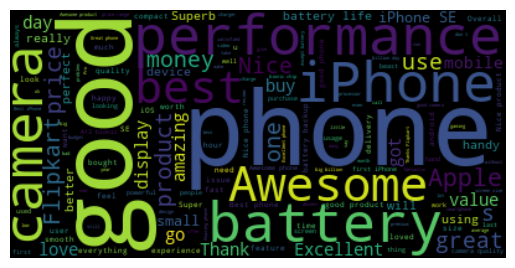

In [27]:
positive = ' '.join(positive_reviews.astype(str))

wordcloud = WordCloud().generate(positive)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

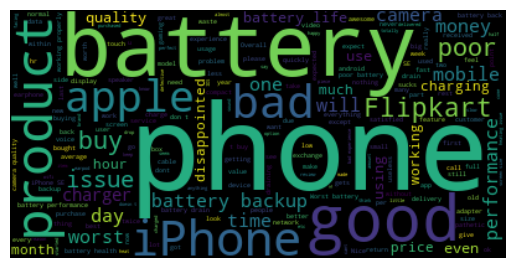

In [28]:
negative = ' '.join(negative_reviews.astype(str))

wordcloud = WordCloud().generate(negative)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()